<a href="https://colab.research.google.com/github/AdrianaCaetano/AI/blob/main/571_AI_assign4_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4

CS 571 AI - Prof Gutta - Spring 2022

Project: Decision Tree Classification for Iris Dataset 


Outputs are best seen in the colab notebook.

STEP 1 - Basic Description of Dataset (features and labels)

The original dataset can be found at UCI Machine Lerning Repository. In the website description, the Iris dataset contains 4 attributes of 150 instances of three species of the iris flower. 

Attributes in the iris dataset: 
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 

Target species to predict:
1. Iris Setosa 
2. Iris Versicolour 
3. Iris Virginica 

In [ ]:
# import iris dataset using sklearn 
from sklearn.datasets import load_iris
iris = load_iris()

# Get attributes /features 
X = iris.data
n_samples, n_features = X.shape

# Print dataset size and attributes description
print("Number of samples:", n_samples)
print("Number of features:", n_features)
print("Features: ", iris.feature_names)

# Get targets /labels
y = iris.target

# Print target /label names
print ("Target species to predict: ", iris.target_names)


Number of samples: 150
Number of features: 4
Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target species to predict:  ['setosa' 'versicolor' 'virginica']


In [ ]:
#Use pandas dataframes to get familiar with the dataset

import pandas as pd
    
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["Species"] = y

print("\nThe first 10 lines of iris dataset")
iris_df.head(10)



The first 10 lines of iris dataset


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [ ]:
print("Iris dataset info")
iris_df.info()

Iris dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
print("Iris dataset stats")
iris_df.describe()

Iris dataset stats


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Specie 0 = Setosa

Specie 1 = Versicolour

Specie 2 = Virginica

In [ ]:
print("Iris species count:\n",iris_df.Species.value_counts())

print("\nMissing values:\n", iris_df.isnull().sum())

Iris species count:
 0    50
1    50
2    50
Name: Species, dtype: int64

Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64


From the tables we can see that the dataset has the same number of samples for each iris specie and there are no missing values.

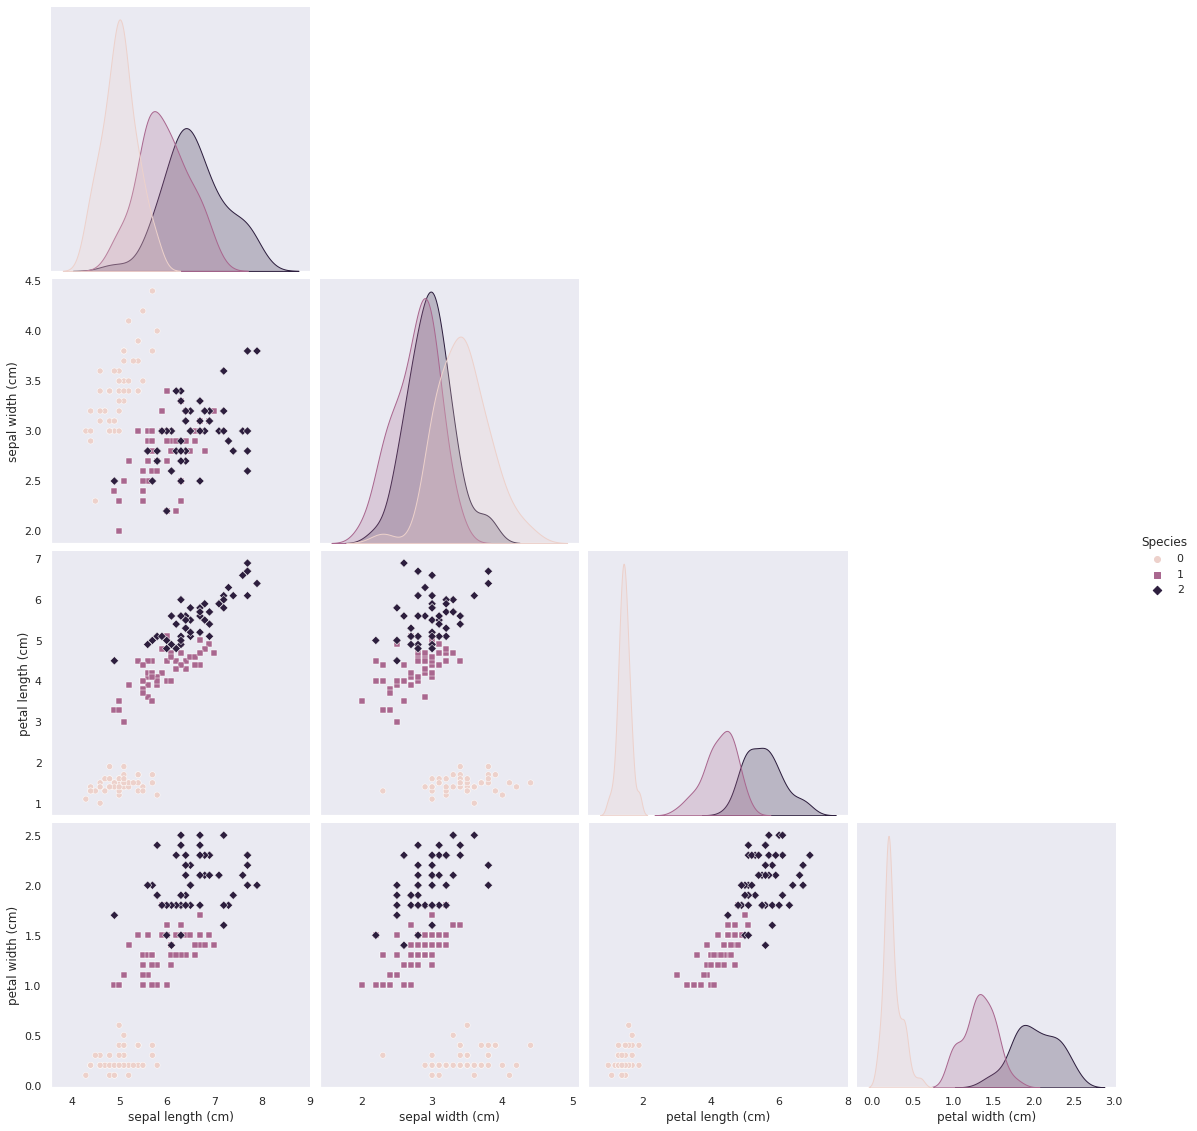

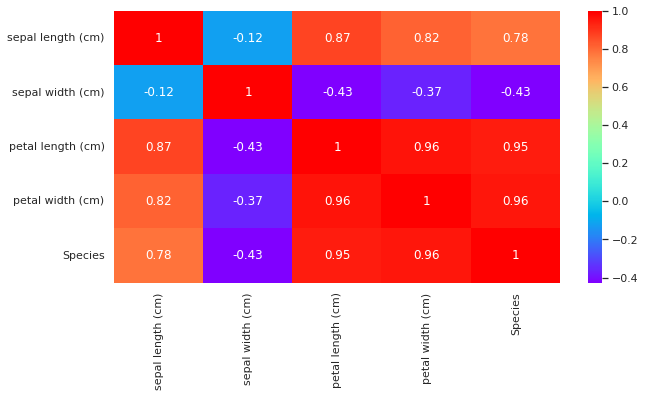

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="dark", color_codes=True)

#Visualize the dataset with 1 feature using histograms or with 2 features using scaterplot
sns.pairplot(iris_df, hue="Species", height=4, diag_kind="kde", markers=["o", "s", "D"], corner=True)
#plt.show()

# heatmap 
plt.figure(figsize = (10,5))
sns.heatmap(iris_df.corr(), annot = True, cmap="rainbow")
plt.show()

# clusterplot
#g = sns.clustermap(iris_df)

Analysing the graphics, we can see that the sepal width and sepal length features have overlaps values for all species. Thus, the petal length and petal width are better predictors of the iris specie we are trying to classify.


Histogram of features


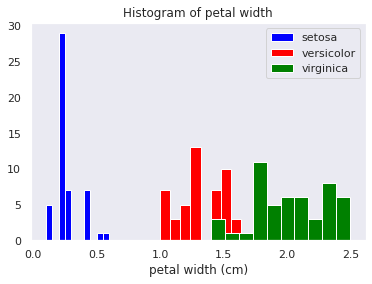

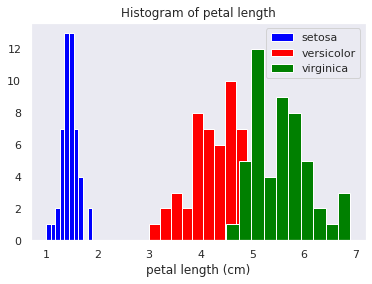

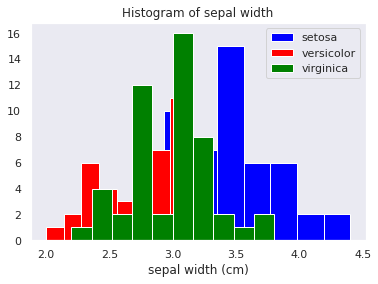

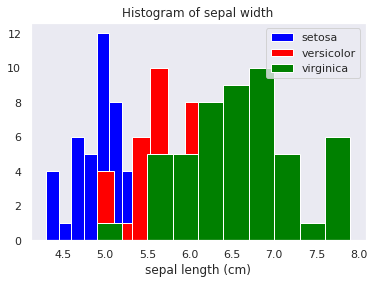


Scaterplot with 2 features


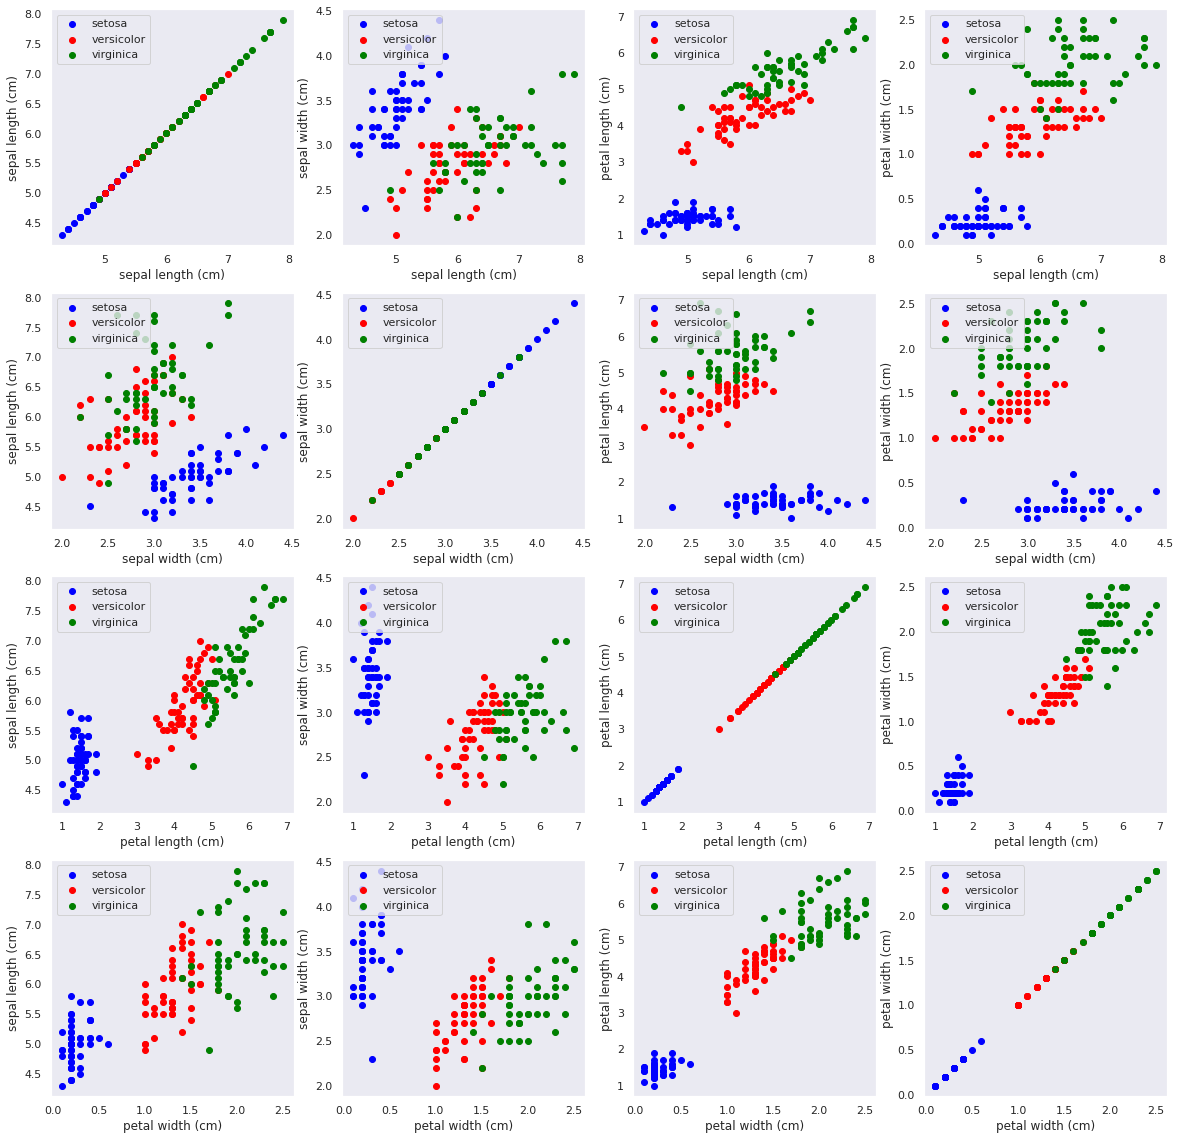

In [ ]:
#Visualize the dataset using 1 feature with histograms
colors = ['blue', 'red', 'green']

print("\nHistogram of features")

# Petal width
fig, ax = plt.subplots()
x_index = 3

for label, color in zip(range(len(iris.target_names)), colors):
    ax.hist(iris.data[iris.target==label, x_index], 
            label=iris.target_names[label],
            color=color)

ax.set_xlabel(iris.feature_names[x_index])
ax.legend(loc='upper right')
plt.title("Histogram of petal width")
plt.show()

# Petal Length
fig, ax = plt.subplots()
x_index = 2

for label, color in zip(range(len(iris.target_names)), colors):
    ax.hist(iris.data[iris.target==label, x_index], 
            label=iris.target_names[label],
            color=color)

ax.set_xlabel(iris.feature_names[x_index])
ax.legend(loc='upper right')
plt.title("Histogram of petal length")
plt.show()

# Sepal width
n = len(iris.feature_names)
fig, ax = plt.subplots()
x_index = 1

for label, color in zip(range(len(iris.target_names)), colors):
    ax.hist(iris.data[iris.target==label, x_index], 
            label=iris.target_names[label],
            color=color)

ax.set_xlabel(iris.feature_names[x_index])
ax.legend(loc='upper right')
plt.title("Histogram of sepal width")
plt.show()

# Sepal length
fig, ax = plt.subplots()
x_index = 0

for label, color in zip(range(len(iris.target_names)), colors):
    ax.hist(iris.data[iris.target==label, x_index], 
            label=iris.target_names[label],
            color=color)

ax.set_xlabel(iris.feature_names[x_index])
ax.legend(loc='upper right')
plt.title("Histogram of sepal width")
plt.show()


#Visualize the dataset using 2 features at a time with scaterplots
print("\nScaterplot with 2 features")

n = len(iris.feature_names)
fig, ax = plt.subplots(n, n, figsize=(20, 20))

for x in range(n):
    for y in range(n):
        xname = iris.feature_names[x]
        yname = iris.feature_names[y]
        for color_ind in range(len(iris.target_names)):
            ax[x, y].scatter(iris.data[iris.target==color_ind, x], 
                             iris.data[iris.target==color_ind, y],
                             label=iris.target_names[color_ind],
                             c=colors[color_ind])

        ax[x, y].set_xlabel(xname)
        ax[x, y].set_ylabel(yname)
        ax[x, y].legend(loc='upper left')

plt.show()


STEP 2 - What is the classification task and why decision tree is a reasonable model for this data?

This is a classification problem, where for the given dataset we try to predict the class of each instance based on its attributes. In this case, we are given petals and sepals length and width to predict the iris flower species. The decision tree seems adequate for this problem because after analysing the dataset it seems possible to predict the species based on a features subset. It is easy to visualize the order of the importantce of the attributes and a decision can be reached by just starting from the root of the tree and comparing the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node. Here, we can see at the first step itself we can identify 'setosa' based on petal length(X[2]) which is the attribute with most information gain.
Decision tree algorithm is effective because it provides better results in classification problems. It is extremely intuitive, easy to implement and provides interpretable predictions. It is relatively easy to tune with.

STEP 3 - Split data into training, validation, and testing sets

In [ ]:
# import iris dataset using sklearn 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
X = iris.data
Y = iris.target

# Split the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100) 
# define random_state to avoid a different random value, and subsequently avoid a different dataset split, each time we run the program 



STEP 4 - Fit a decision tree on the training dataset


Decision Tree on all Iris Features Trained using Default Model



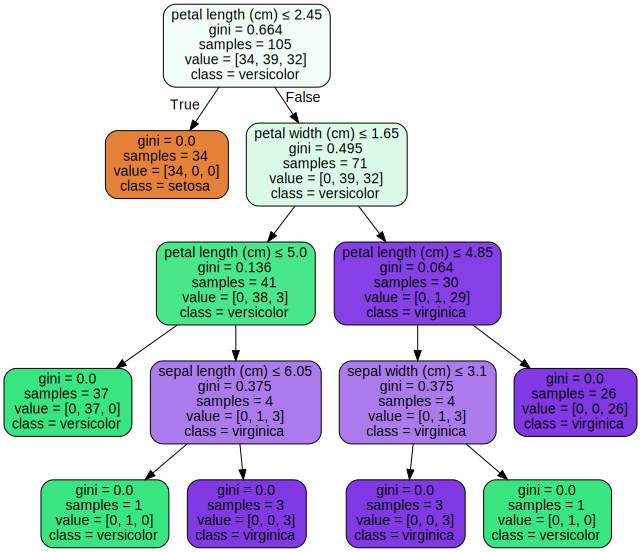

In [ ]:
from sklearn import tree
from sklearn.model_selection import KFold, cross_val_score
from numpy import mean
from numpy import std
from sklearn.metrics import accuracy_score

# create the Decision Tree model (default hyperparamters)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
acc=accuracy_score(y_train,y_pred)

print("\nDecision Tree on all Iris Features Trained using Default Model\n")
#tree.plot_tree(clf, filled=True)

import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 


STEP 5 - Tune at least 2 hyperparameters in the decision tree model based on the performance on the validation set or using cross-validation. One hyperparameter has to be max_depth. Generate a plot of hyperparameter values w.r.t. performance metric


Accuracy without cross-validation using Gini:  1.0
Accuracy without cross-validation using Entropy:  1.0
Accuracy with 2 fold cross-validation using Gini: 0.972 (0.009)
Accuracy with 2 fold cross-validation using Entropy: 0.972 (0.009)
Accuracy with 3 fold cross-validation using Gini: 0.952 (0.027)
Accuracy with 3 fold cross-validation using Entropy: 0.952 (0.027)
Accuracy with 4 fold cross-validation using Gini: 0.933 (0.016)
Accuracy with 4 fold cross-validation using Entropy: 0.934 (0.030)
Accuracy with 5 fold cross-validation using Gini: 0.971 (0.023)
Accuracy with 5 fold cross-validation using Entropy: 0.952 (0.030)
Accuracy with 6 fold cross-validation using Gini: 0.962 (0.027)
Accuracy with 6 fold cross-validation using Entropy: 0.953 (0.038)
Accuracy with 7 fold cross-validation using Gini: 0.943 (0.043)
Accuracy with 7 fold cross-validation using Entropy: 0.933 (0.062)
Accuracy with 8 fold cross-validation using Gini: 0.935 (0.077)
Accuracy with 8 fold cross-validation using E

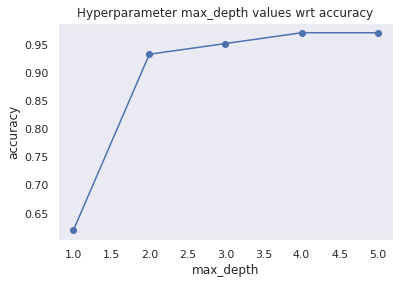

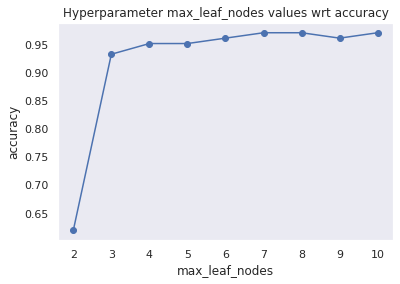

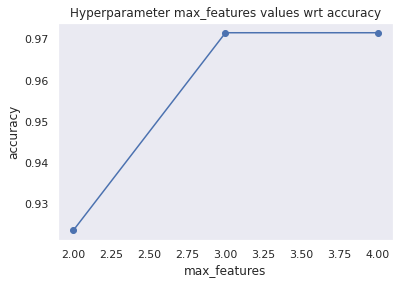

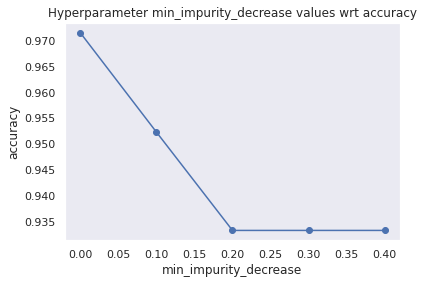

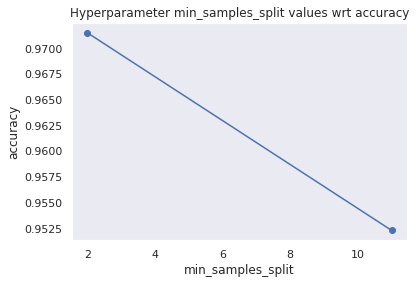

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Compare performance of Gini and Entropy hyperparameters
clfE = tree.DecisionTreeClassifier(criterion='entropy')
clfE.fit(X_train, y_train)
y_predE = clfE.predict(X_train)
accE=accuracy_score(y_train,y_predE)

print("Accuracy without cross-validation using Gini: ",acc)
print("Accuracy without cross-validation using Entropy: ",accE)

# Evaluate the models Gini vs Entropy for different k folds on cross validation
for n in range (2, 11):
  # Prepare the k-fold cross validation
  kf = KFold(random_state=10, shuffle=True, n_splits= n) # random_state= an int for reproducible output across multiple function calls
  scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=kf, n_jobs=-1)
  scoresE = cross_val_score(clfE, X_train, y_train, scoring='accuracy', cv=kf, n_jobs=-1)
  print('Accuracy with %.0f fold cross-validation using Gini: %.3f (%.3f)' % (n, mean(scores), std(scores)))
  print('Accuracy with %.0f fold cross-validation using Entropy: %.3f (%.3f)' % (n, mean(scoresE), std(scoresE)))

# Variables to hold hyperparameter values in test
max_depth=[]
acc_metric1=[]  # to hold accuracy of max_depth hyperparemeter
max_leaf_nodes=[]
acc_metric2=[] # to hold accuracy of max_leaf_nodes hyperparemeter
max_features=[]
acc_metric3=[] # to hold accuracy of max_features hyperparemeter
min_impurity_decrease=[]
acc_metric4=[] # to hold accuracy of min_impurity hyperparemeter
min_samples_split =[]
acc_metric5=[] # to hold accuracy of min_samples_split hyperparemeter

kf = KFold(random_state=10, shuffle=True, n_splits= 2) # 2 fold gives high accuracy on Entropy and Gini

# Model 1, tune max_depth hyperparameter
print("\nModel 1:")
for n in range (1, 6):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=n)
    scores = cross_val_score(clf, X_train, y_train, cv=kf)
    print("Hyperparameter tuning: max_depth= ", n)
    print('\tAccuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    max_depth.append(n)
    acc_metric1.append(mean(scores))

#Model 2, tune max_leaf_nodes hyperparameter
print("\nModel 2:")
for n in range (2, 11):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=n)
    scores = cross_val_score(clf, X_train, y_train, cv=kf)
    print("Hyperparameter tuning: max_leaf_nodes=", n)
    print('\tAccuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    max_leaf_nodes.append(n)
    acc_metric2.append(mean(scores))

# Model 3, tune max_features hyperparameter
print("\nModel 3:")
for n in range (2, 5):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_features = n)
    scores = cross_val_score(clf, X_train, y_train, cv=kf)
    print("Hyperparameter tuning: max_features = ", n)
    print('\tAccuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    max_features.append(n)
    acc_metric3.append(mean(scores))

# Model 4, tune min_impurity hyperparameter
print("\nModel 4:")
step_size = np.arange(0.0, 0.5, 0.1)
for n in step_size:
    clf = tree.DecisionTreeClassifier(criterion='entropy', min_impurity_decrease = n)
    scores = cross_val_score(clf, X_train, y_train, cv=kf)
    print("Hyperparameter tuning: min_impurity_decrease = ", n)
    print('\tAccuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    min_impurity_decrease.append(n)
    acc_metric4.append(mean(scores))

# Model 5, min_samples_split hyperparameter
print("\nModel 5:")
for n in (2, 11):
    clf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split = n)
    scores = cross_val_score(clf, X_train, y_train, cv=kf)
    print("Hyperparameter tuning: min_samples_split = ", n)
    print('\tAccuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    min_samples_split.append(n)
    acc_metric5.append(mean(scores))


plt.title("Hyperparameter max_depth values wrt accuracy") 
plt.xlabel("max_depth") 
plt.ylabel("accuracy") 
plt.plot(max_depth,acc_metric1,marker='o', color='b')
plt.show()

plt.title("Hyperparameter max_leaf_nodes values wrt accuracy") 
plt.xlabel("max_leaf_nodes") 
plt.ylabel("accuracy") 
plt.plot(max_leaf_nodes,acc_metric2,marker='o', color='b')
plt.show()

plt.title("Hyperparameter max_features values wrt accuracy") 
plt.xlabel("max_features") 
plt.ylabel("accuracy") 
plt.plot(max_features,acc_metric3,marker='o', color='b')
plt.show()

plt.title("Hyperparameter min_impurity_decrease values wrt accuracy") 
plt.xlabel("min_impurity_decrease") 
plt.ylabel("accuracy") 
plt.plot(min_impurity_decrease,acc_metric4,marker='o', color='b')
plt.show()

plt.title("Hyperparameter min_samples_split values wrt accuracy") 
plt.xlabel("min_samples_split") 
plt.ylabel("accuracy") 
plt.plot(min_samples_split,acc_metric5,marker='o', color='b')
plt.show()

Based on the results of the tests above, we decided on the following hyperparameters values:
- criterion: Entropy 
- k fold cross validation = 2
- max depth = 3
- max_leaf_nodes = 4

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3 , max_leaf_nodes=4)
scores = cross_val_score(clf, X_train, y_train, cv=kf)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.952 (0.010)


STEP 6 - Test the model on the testing dataset and generate a classification report

Model Evaluation: 
*   Confusion Matrix ->  Cij is equal to the number of observations known to be in group 'i' and predicted to be in group 'j'. Confusion matrix whose i-th row and j-th column entry indicates the number of samples with true label being i-th class and predicted label being j-th class
*   Accuracy -> a fraction of correctly classified samples
*   F1 score -> The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0 ( F1 = 2 * (precision * recall) / (precision + recall) ) 
* Precision = fraction of true positive over total positive predicted
* Recall = fraction of true positive over total positive on dataset









+-------------------+-------------------+
|        Data       | Predicted species |
+-------------------+-------------------+
| [6.4 2.8 5.6 2.1] |     virginica     |
| [4.8 3.4 1.6 0.2] |       setosa      |
| [7.7 2.6 6.9 2.3] |     virginica     |
| [5.7 4.4 1.5 0.4] |       setosa      |
| [6.3 2.7 4.9 1.8] |     virginica     |
| [7.7 3.  6.1 2.3] |     virginica     |
| [5.2 4.1 1.5 0.1] |       setosa      |
| [4.9 3.  1.4 0.2] |       setosa      |
| [6.5 3.  5.5 1.8] |     virginica     |
| [4.8 3.  1.4 0.3] |       setosa      |
| [5.  3.5 1.3 0.3] |       setosa      |
| [6.4 3.2 5.3 2.3] |     virginica     |
| [5.  3.4 1.6 0.4] |       setosa      |
| [5.2 3.4 1.4 0.2] |       setosa      |
| [6.7 3.  5.2 2.3] |     virginica     |
| [6.2 2.9 4.3 1.3] |     versicolor    |
| [6.  2.2 4.  1. ] |     versicolor    |
| [6.7 3.  5.  1.7] |     virginica     |
| [7.7 2.8 6.7 2. ] |     virginica     |
| [6.8 3.  5.5 2.1] |     virginica     |
| [7.2 3.2 6.  1.8] |     virginic

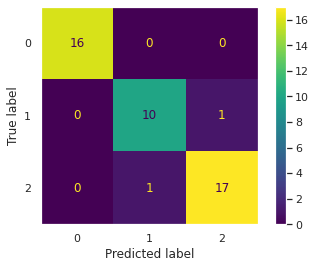


Accuracy: 0.956

F1 score: [1.         0.90909091 0.94444444]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from prettytable import PrettyTable
# Use the best performance model during training and validation on test dataset
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
t = PrettyTable(['Data', 'Predicted species'])
for i in range(len(y_pred)):
  if y_pred[i]==0:s='setosa'
  elif y_pred[i]==1:s='versicolor'
  elif y_pred[i]==2:s='virginica'
  t.add_row([X_test[i], s])
print(t)  
print("\nConfusion Matrix:\n" )
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

acc = accuracy_score(y_test, y_pred)
print("\nAccuracy: %.3f" % acc)

f1 = f1_score(y_test, y_pred, average=None)
print("\nF1 score:", f1)


STEP 7 - Inspect the model by visualizing and interpreting the results

Final Decision Tree:



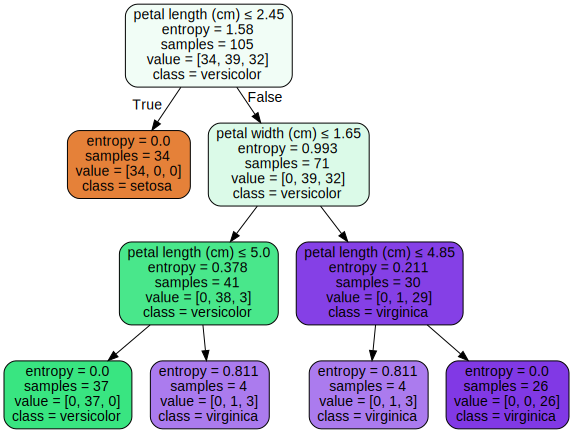

In [ ]:
print("Final Decision Tree:\n")
#tree.plot_tree(clf)

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

As we have already noticed analysing the raw data graphics, the petal width and the petal length are the best predictors of the iris species. After pruning the decision tree using the hyperparameters, these are the features selected to classify new data. The final metrics of this model show that we can reach a high accuracy of 95.6% with a high F1-score over 90% on all classes. 